In [1]:
import pandas as pd
import numpy as np

In [37]:
!ls -a

.  ..  david_test-agg-15m.csv  .ipynb_checkpoints  Traffic_Analysis.ipynb


## 데이터를 읽어들이고 가공 / 분석 / 학습 / 예측 / 검증 단계를 거칩니다.

In [2]:
agg_result_data = pd.read_csv('./david_test-agg-15m.csv', index_col=0)

In [3]:
agg_result_data.head(5)

,avg_pkt_size,bytes,icmpv,tcp,udp,fragments,reassembled,sessions,flow_tcp,flow_udp
timestamp,,,,,,,,,,
2018-04-10 03:30:00,657.000000,11003275.000000,37.818182,9985.636364,3854.272727,37.454545,6.181818,156.909091,230.454545,272.181818
2018-04-10 03:45:00,656.738532,11928110.577982,32.995413,10276.839450,3064.477064,37.651376,6.362385,126.839450,188.009174,198.550459
2018-04-10 04:00:00,655.488584,12616497.173516,22.018265,11453.232877,3996.260274,93.780822,14.671233,165.707763,255.260274,221.054795
2018-04-10 04:15:00,657.525346,44449791.935484,19.055300,20547.921659,5818.709677,91.470046,14.635945,157.921659,250.792627,206.281106
2018-04-10 04:30:00,658.753425,19667827.041096,23.146119,16379.159817,4220.100457,59.502283,10.022831,161.278539,254.538813,219.470320


In [4]:
agg_result_data = agg_result_data.reset_index(drop=True)
agg_result_data = agg_result_data.drop('avg_pkt_size', axis=1)

In [5]:
values = agg_result_data.as_matrix()

In [6]:
values.shape

(1345, 9)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
values = values.astype('float64')
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(values)

In [9]:
T = values[:1000, 1:]
y = values[:1000, 0]
X = values[:1000, 1:]

In [10]:
from sklearn import metrics, neighbors
import matplotlib.pyplot as plt

In [11]:
n_neighbors = 2

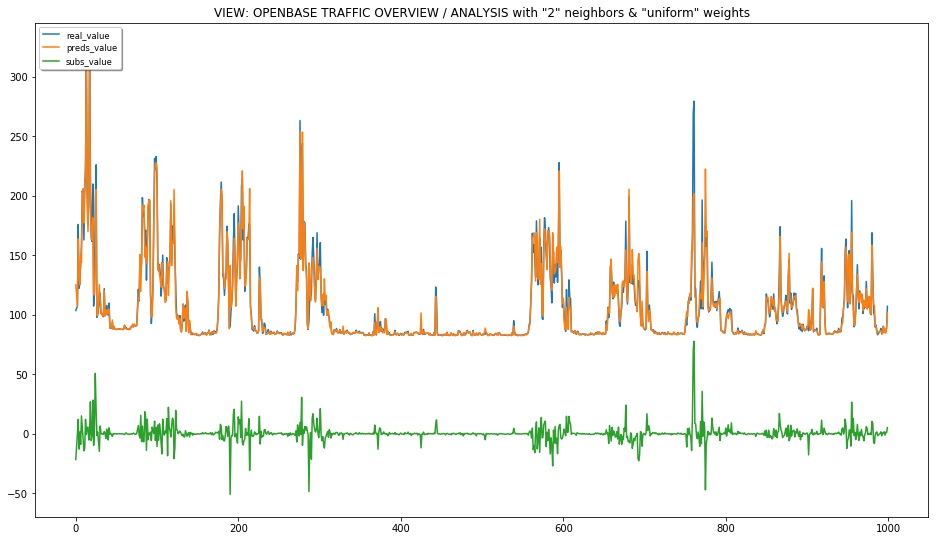

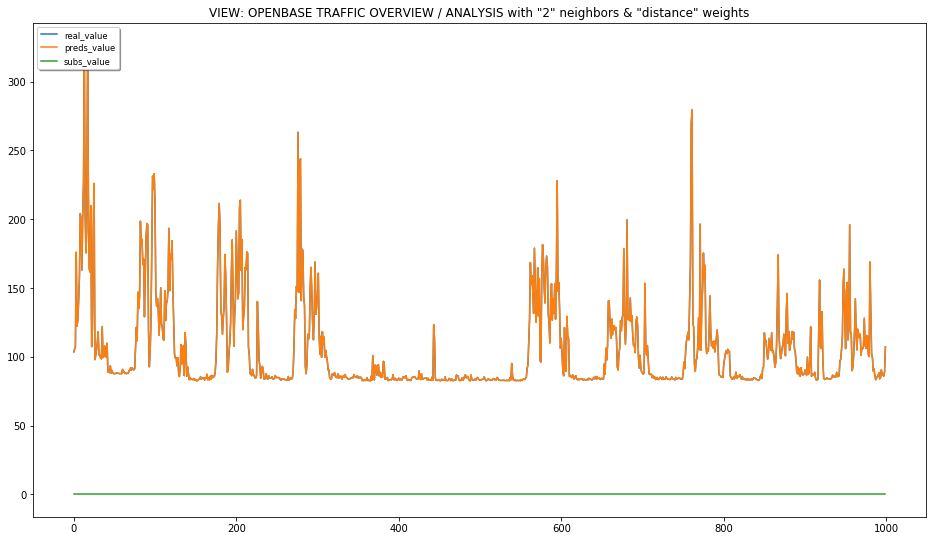

In [33]:
for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    model = knn.fit(X, y)
    y_ = model.predict(T)
    
    plt.figure(figsize=(16,20))
    plt.subplot(2, 1, i+1)
    
    yy_ = y.reshape(-1, 1)
    yy__ = y_.reshape(-1, 1)
    
    yy_ = np.concatenate((X, yy_), axis=1)
    yy__ = np.concatenate((T, yy__), axis=1)
    
    yy_ = scaler.inverse_transform(yy_)
    yy_ = yy_[:, -1:]
    
    yy__ = scaler.inverse_transform(yy__)
    yy__ = yy__[:, -1:]
    
    
    yy___ = yy_ - yy__
    
    plt.plot(yy_, label='real_value')
    plt.plot(yy__, label='preds_value')
    plt.plot(yy___, label='subs_value')
    
    plt.legend(loc='upper left', shadow=True, fontsize='small')
    plt.title('VIEW: %s with "%d" neighbors & "%s" weights' % ('OPENBASE TRAFFIC OVERVIEW / ANALYSIS', n_neighbors, weights))

## 데이터 오차 확인

In [34]:
T2 = values[1000:, 1:]
y2 = values[1000:, 0]

TypeError: list indices must be integers, not tuple

Text(0.5,1,u'VIEW: OPENBASE TRAFFIC OVERVIEW / ANALYSIS with "2" neighbors & "distance" weights')

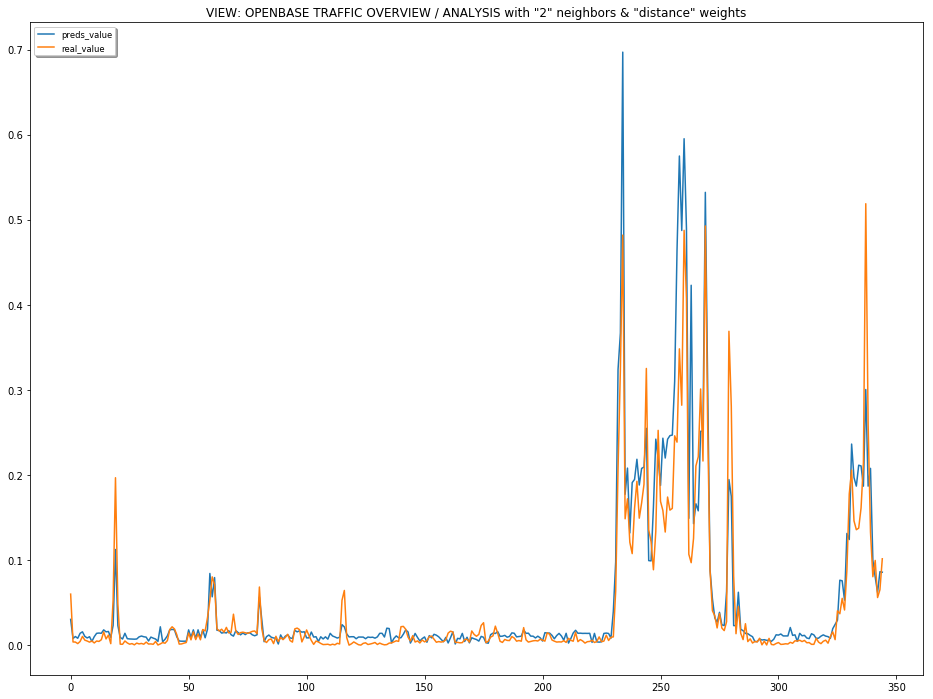

In [35]:
y2_ = model.predict(T2)
    
plt.figure(figsize=(16,12))
plt.plot(y2_, label='preds_value')
plt.plot(y2, label='real_value')

plt.legend(loc='upper left', shadow=True, fontsize='small')
plt.title('VIEW: %s with "%d" neighbors & "%s" weights' % ('OPENBASE TRAFFIC OVERVIEW / ANALYSIS', n_neighbors, weights))

## 모델에 대한 평가 후, 각 Feature 의 특징과 관계를 살펴본다.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from math import pi

In [26]:
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

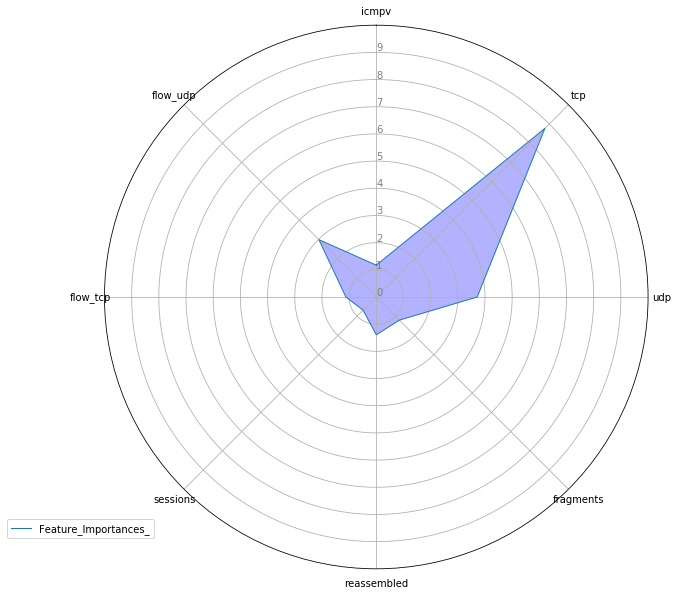

In [30]:
categories=['icmpv','tcp','udp','fragments', 'reassembled', 'sessions', 'flow_tcp', 'flow_udp']
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
plt.figure(figsize=(10, 10))
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(range(0, 10), color="grey", size=10)
plt.ylim(0, 10)

# TCP 가 너무나 큰 우위를 가지고 있어 그래프에 표현이 어려움.
# 각 피쳐의 중요도를 조금 수정함.
values= [0.01172184*100, 0.87736905*10, 0.03712849*100, 0.0120308*100, 0.01389738*100, 0.00685157*100, 0.0111831*100, 0.02981778*100]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Feature_Importances_")
ax.fill(angles, values, 'b', alpha=0.3)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [32]:
agg_result_data.head(50)

,bytes,icmpv,tcp,udp,fragments,reassembled,sessions,flow_tcp,flow_udp
0,1.100328e+07,37.818182,9985.636364,3854.272727,37.454545,6.181818,156.909091,230.454545,272.181818
1,1.192811e+07,32.995413,10276.839450,3064.477064,37.651376,6.362385,126.839450,188.009174,198.550459
2,1.261650e+07,22.018265,11453.232877,3996.260274,93.780822,14.671233,165.707763,255.260274,221.054795
3,4.444979e+07,19.055300,20547.921659,5818.709677,91.470046,14.635945,157.921659,250.792627,206.281106
4,1.966783e+07,23.146119,16379.159817,4220.100457,59.502283,10.022831,161.278539,254.538813,219.470320
5,2.172510e+07,23.876147,16849.990826,4074.389908,48.600917,9.954128,150.027523,235.885321,212.889908
6,2.840533e+07,29.449541,18162.894495,7049.110092,120.110092,14.871560,173.288991,265.527523,241.899083
7,3.663604e+07,27.069124,18694.327189,6065.410138,142.686636,46.258065,164.746544,265.216590,226.239631
8,5.747203e+07,29.261468,51634.573394,6412.522936,118.568807,39.137615,175.045872,277.669725,225.908257
9,5.567898e+07,32.697248,40699.082569,6521.055046,260.362385,84.211009,192.715596,307.252294,237.752294
